In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
insurance=pd.read_csv('new_insurance_data.csv')

In [120]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [121]:
# import libraries
# import dataset
# EDA --> Exploratory Data Analysis --> To understand the data
# Data Cleaning
# Build Model

In [4]:
insurance.shape  # The no. of rows and columns in the dataset

(1338, 13)

In [5]:
insurance.info()  # no. of  non-null values, total columns, no. of rows, data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
1338 - 1329

9

In [125]:
insurance.isnull()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
insurance.isnull().sum() # Null values

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [127]:
insurance.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [128]:
insurance

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [129]:
# When the data type is = object --> replace with mode()
# When the data type is = Numeric --> replace with mean()/median()

# If the data type of the column is numeric(int/float)-->
# Outliers present --> replace the null values with median()
# Outliers not present --> replace the null values with mean()

In [11]:
type(insurance)

pandas.core.frame.DataFrame

In [12]:
insurance.columns  # extract all the column names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [13]:
col=list(insurance.columns) # type casting --> changing the data type

In [14]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [15]:
type(col)

list

In [20]:
insurance['smoker'].mode()

0    no
Name: smoker, dtype: object

In [21]:
insurance['smoker'].mode()[0]

'no'

In [138]:
insurance['children'].mean()

1.0907726931732933

In [139]:
insurance['age'].mean()

39.31000752445448

In [17]:
insurance.describe() # statistical analysis

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [16]:
insurance.isnull().sum() 

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [141]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [18]:
# Replacing the null values with mean and mode
for i in col:  # for i in col:
    if insurance[i].dtypes=='object':  # i --> age, sex, bmi,etc..
        #print('ob')
        insurance[i] = insurance[i].fillna(insurance[i].mode()[0])
    else:
        #print('num')
        insurance[i] = insurance[i].fillna(insurance[i].mean())

In [143]:
# To find the upper limit --> Q3 + 1.5*IQR
# To find the lower limit --> Q1 - 1.5*IQR

In [144]:
'''#object ---> mode
# num------> mean/median

 #mode---> most repeated data----> object

#numeric
 #median---> center
# mean---> avg

10 5 50 17 15 ?
mean---> 20
median---> 15
5 10 15 17 99

#  mode
y n y y y n ?
y--->4
n--->2
Y'''

'#object ---> mode\n# num------> mean/median\n\n #mode---> most repeated data----> object\n\n#numeric\n #median---> center\n# mean---> avg\n\n10 5 50 17 15 ?\nmean---> 20\nmedian---> 15\n5 10 15 17 99\n\n#  mode\ny n y y y n ?\ny--->4\nn--->2\nY'

In [145]:
#10 + 5 + 50 + 17 + 15
#97/5
# fillna() --> replace the null values with mean, median, mode

In [19]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [22]:
insurance.shape

(1338, 13)

In [148]:
insurance['age'].dtype # for knowing the data type of a column

dtype('float64')

In [23]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [24]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [25]:
#seaborn 
# Whenever you build any model, then in EDA, there comes a visulaization part.
# In general, check for the distribution of the data and for outliers.

# I want to check the distribution of the data
import seaborn as sns

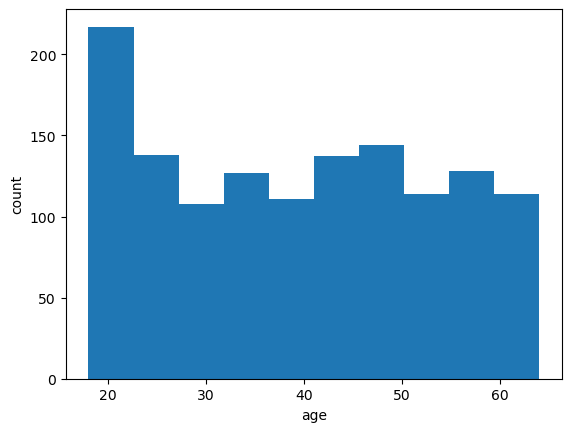

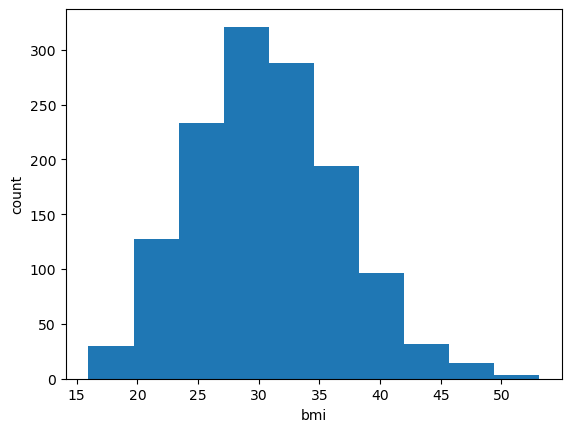

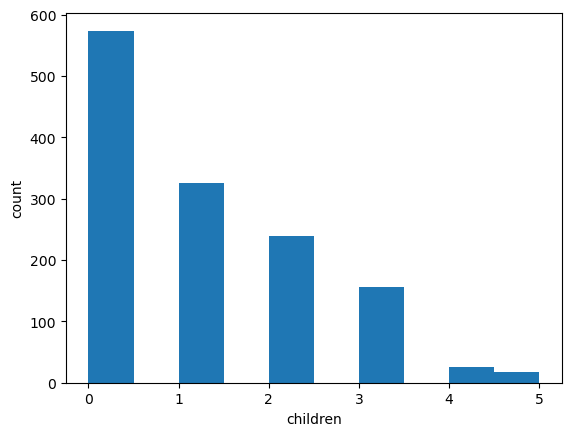

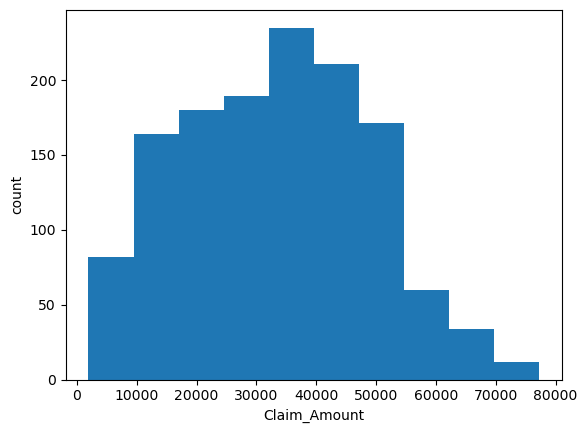

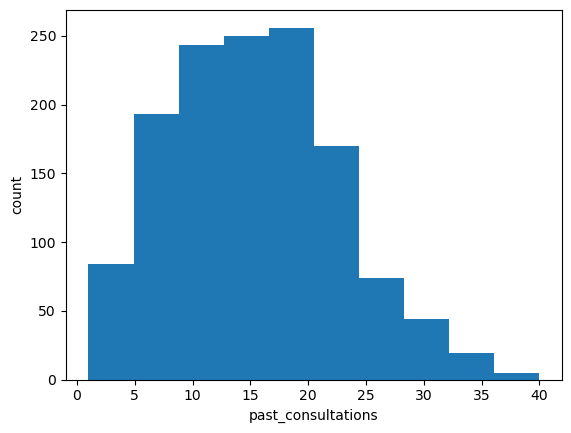

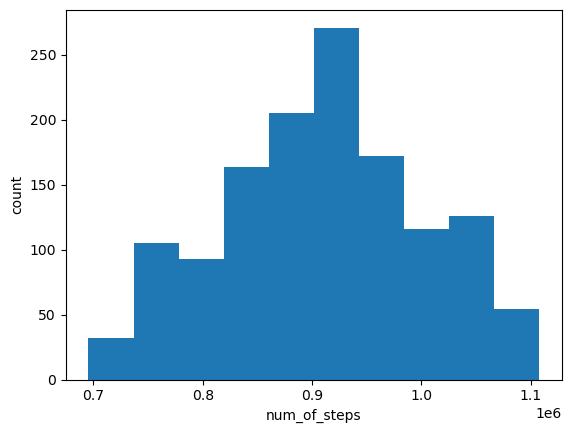

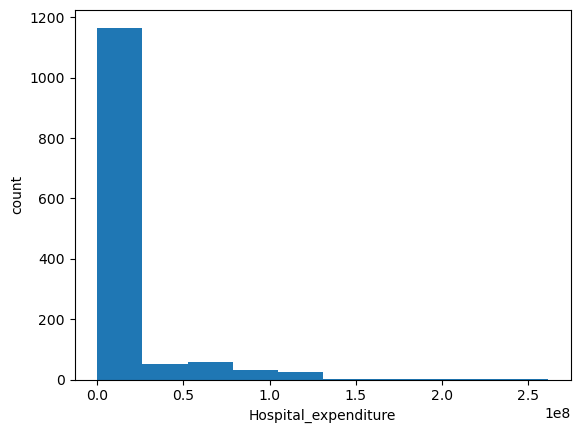

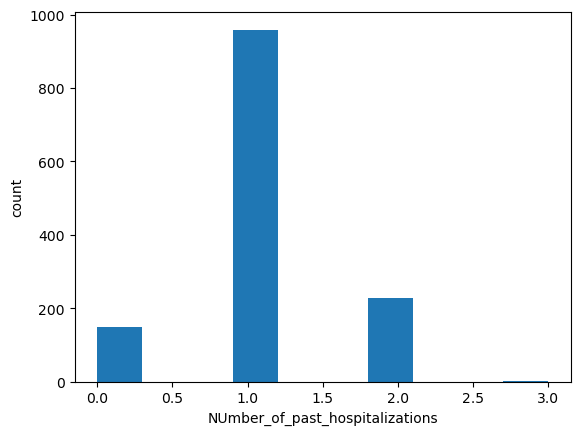

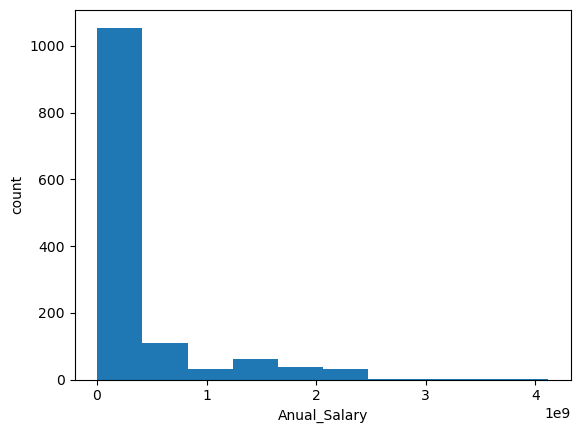

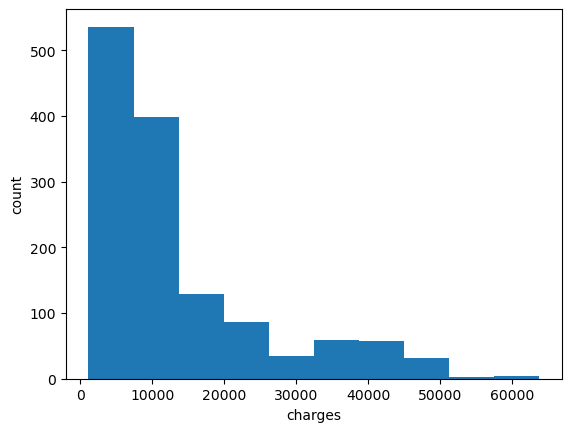

In [26]:
# The distribution of the data
for col_name in col:  # for i in col:
    if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.hist(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [153]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

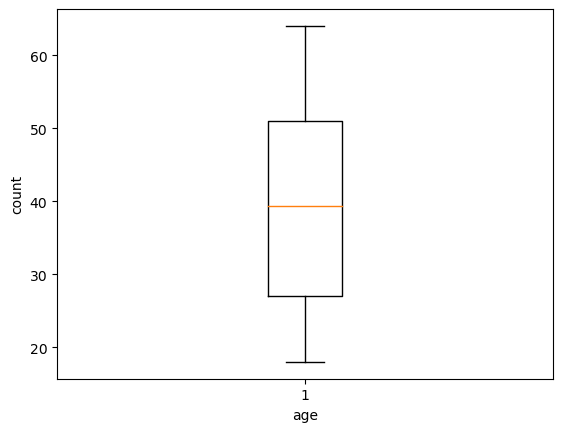

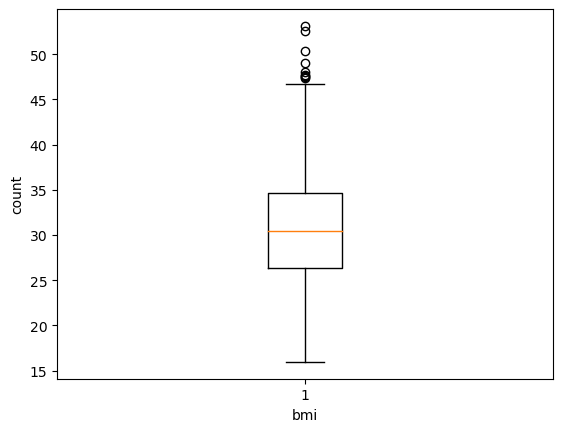

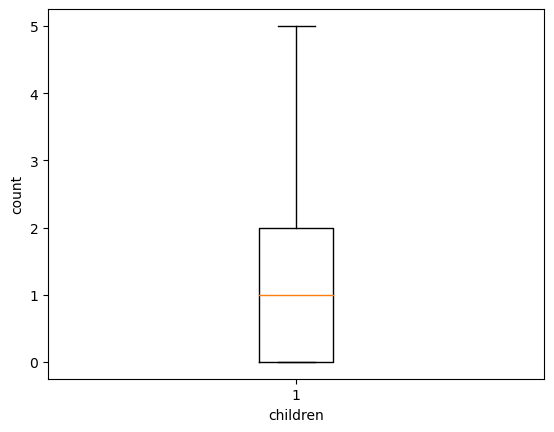

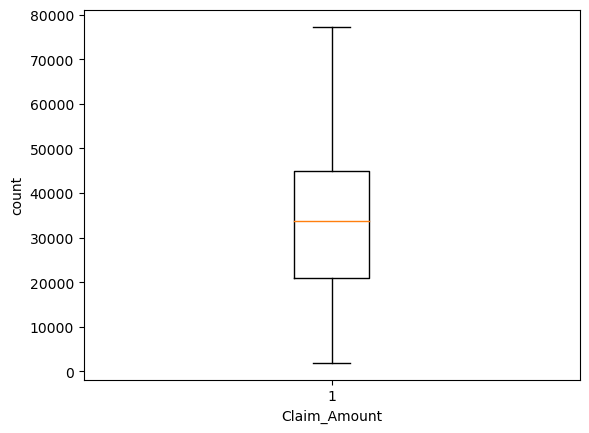

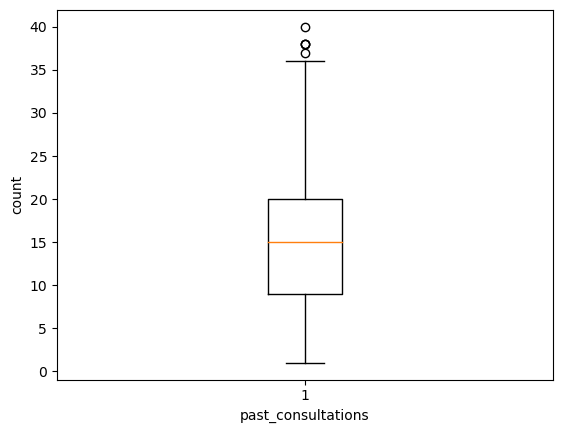

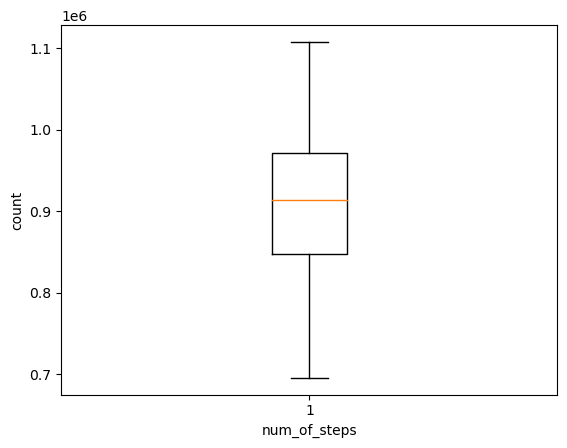

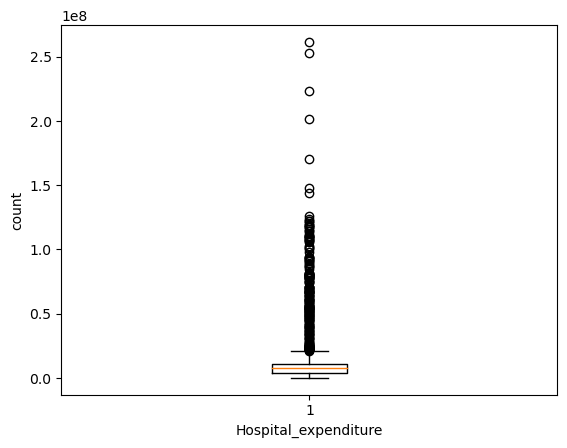

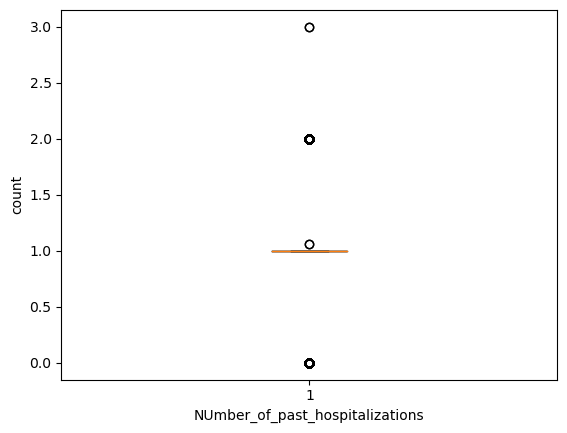

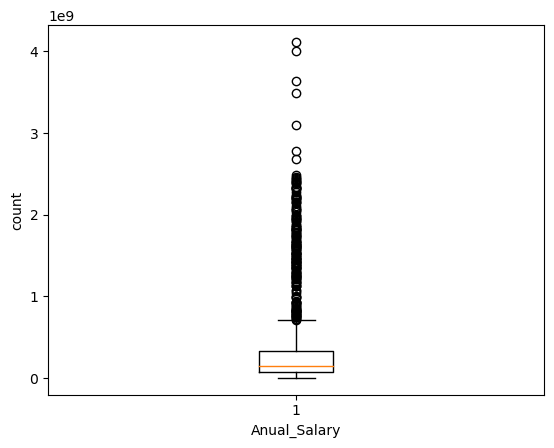

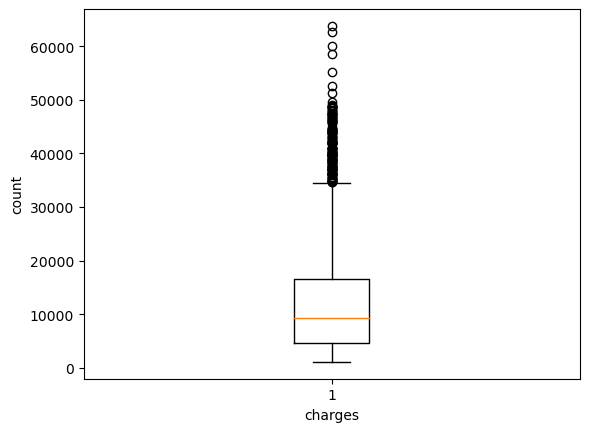

In [27]:
# Outliers

for col_name in col:
    if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [79]:
insurance.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,13.987500,6.094840,1.199606,15535.307255,7.450948,9.178297e+04,2.665309e+07,0.533184,5.656109e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.310008,30.400000,1.000000,33611.286065,15.000000,9.140155e+05,7.500985e+06,1.000000,1.422756e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.090187e+07,1.000000,3.298713e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [80]:
#treating outliers

In [81]:
Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)

In [82]:
Q1

26.315

In [83]:
Q3

34.65625

In [84]:
IQR = Q3 - Q1
IQR

8.341249999999999

In [85]:
Q1 - 1.5*IQR # To know the lower limit

13.803125000000003

In [86]:
Q3 + 1.5*IQR # To know the upper limit

47.168124999999996

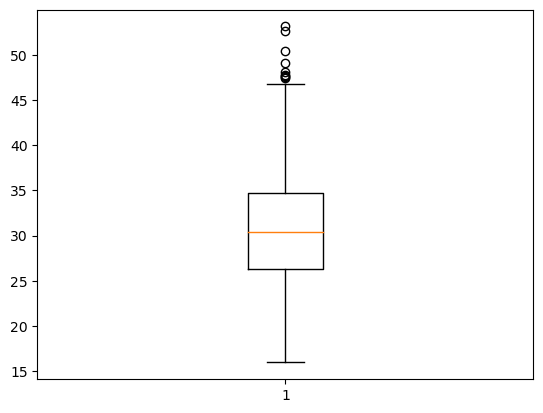

In [87]:
plt.boxplot(insurance['bmi'])
plt.show()

In [88]:
#insurance[(insurance['sex']=='male') & (insurance['smoker']=='no')]

In [28]:

Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.bmi >= Q1 - 1.5*IQR) & (insurance.bmi <= Q3 + 1.5*IQR)]

Q1 = insurance.past_consultations.quantile(0.25)
Q3 = insurance.past_consultations.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.past_consultations >= Q1 - 1.5*IQR) & (insurance.past_consultations <= Q3 + 1.5*IQR)]

Q1 = insurance.Hospital_expenditure.quantile(0.25)
Q3 = insurance.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Hospital_expenditure >= Q1 - 1.5*IQR) & (insurance.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = insurance.Anual_Salary.quantile(0.25)
Q3 = insurance.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Anual_Salary >= Q1 - 1.5*IQR) & (insurance.Anual_Salary <= Q3 + 1.5*IQR)]


In [29]:
# for col_name in col:
#     if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
#         Q1 = insurance[col_name].quantile(0.25)
#         Q3 = insurance[col_name].quantile(0.75)
#         IQR = Q3-Q1
#         insurance = insurance[(insurance.col_name>=Q1-1.5*IQR)&(insurance.col_name<=Q3+1.5*IQR)]

In [ ]:
for col_name in col:
    if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        Q1 = insurance[col_name].quantile(0.25)
        Q3 = insurance[col_name].quantile(0.75)
        IQR = Q3-Q1
        insurance = insurance[(insurance.col_name>=Q1-1.5*IQR)&(insurance.col_name<=Q3+1.5*IQR)]


In [157]:
insurance.shape

(1030, 13)

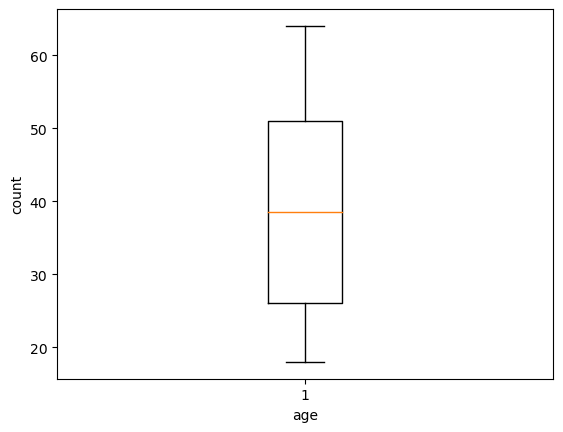

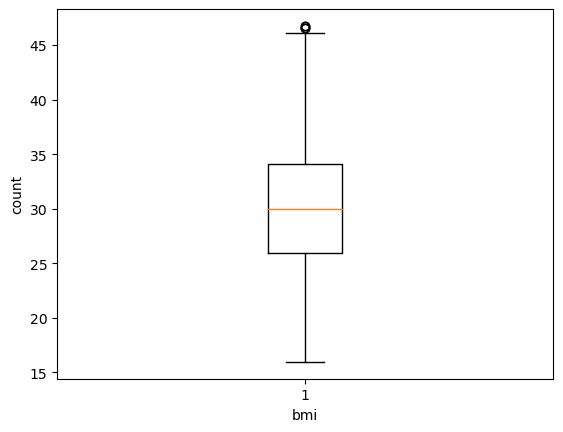

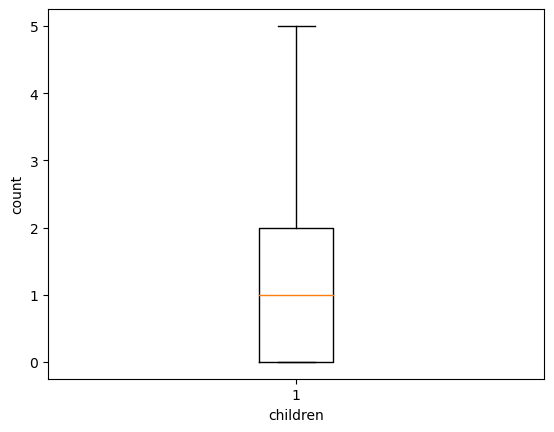

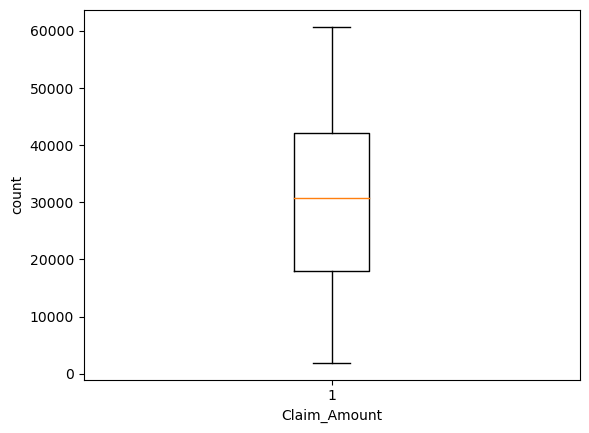

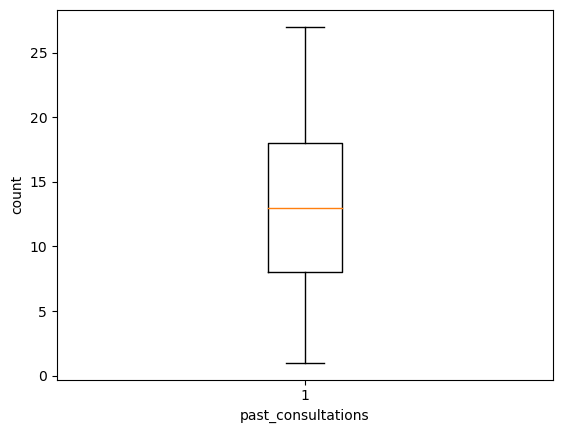

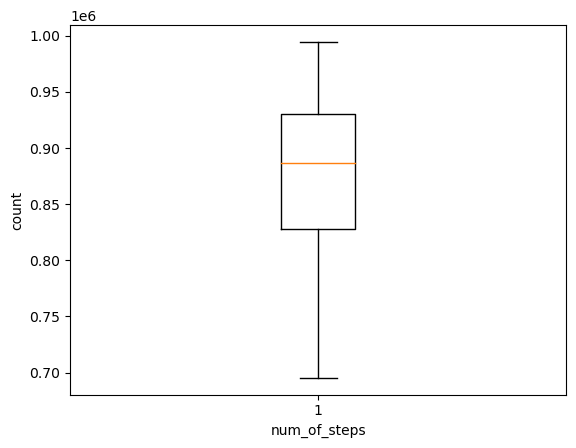

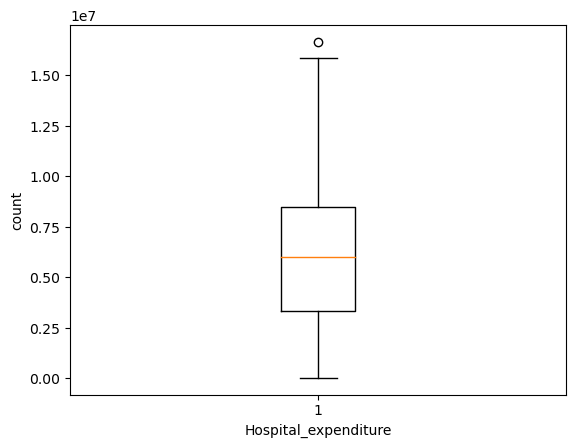

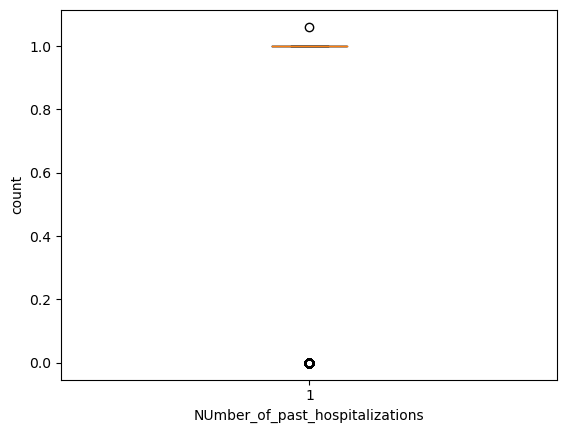

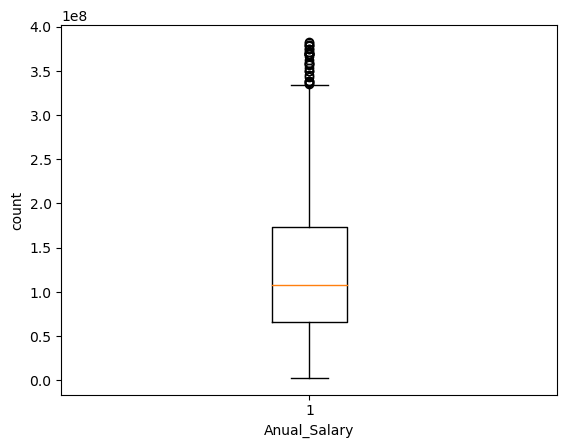

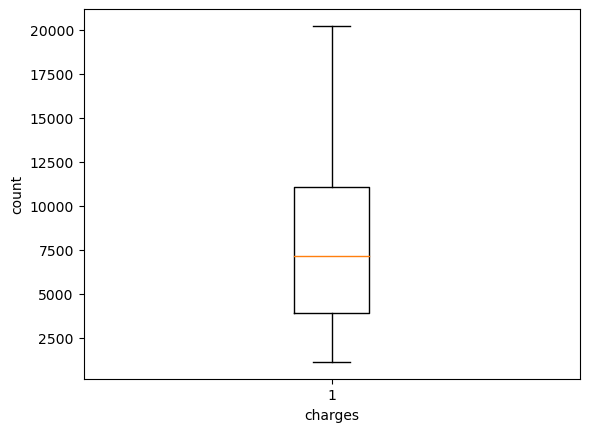

In [30]:
for col_name in col:
    if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
        plt.boxplot(insurance[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [159]:
insurance.corr() # Relationship between two variables
# Multicollinearity --> Correlation of one variable with all the other variables at once

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [160]:
# Independent variable
# Dependent variable

In [161]:
insurance.shape

(1030, 13)

In [96]:
#age, date of birth, 10th_year, 12th_year,--- anual expediture of the customer

In [162]:
# VIF --> Variance Inflation Factor helps us to see whether multicollinearity is present or not
# VIF = 1 --> Variables are not correlated
# VIF (1-5) --> Variables are moderately correlated --> Acceptable
# VIF >5 --> vARIABLES ARE HIGHLY CORRELATED (Drop those columns)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.model_selection import train_test_split

In [165]:
#corelation
#age, gender,---- 
#charges

In [166]:
#multi-colinearirity== 5 or 6
#age, gender, dob, ---- 
#charges
# Independent

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)

In [32]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [169]:
X = insurance[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [170]:
X.values

array([[1.80000000e+01, 2.32100000e+01, 0.00000000e+00, ...,
        4.72092099e+06, 0.00000000e+00, 5.57849700e+07],
       [1.80000000e+01, 3.01400000e+01, 0.00000000e+00, ...,
        4.32983168e+06, 0.00000000e+00, 1.37008852e+07],
       [1.80000000e+01, 3.33300000e+01, 0.00000000e+00, ...,
        6.88486077e+06, 0.00000000e+00, 7.35231073e+07],
       ...,
       [3.10000000e+01, 2.98100000e+01, 0.00000000e+00, ...,
        1.02899068e+07, 1.00000000e+00, 3.74530951e+08],
       [4.30000000e+01, 2.00450000e+01, 2.00000000e+00, ...,
        1.08303011e+07, 1.00000000e+00, 3.69684860e+08],
       [3.50000000e+01, 2.80250000e+01, 0.00000000e+00, ...,
        1.24774431e+07, 1.00000000e+00, 3.69684860e+08]])

In [171]:
for i in range(len(X.columns)):
    print(i)

0
1
2
3
4
5
6
7
8


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [173]:
len(X.columns)

9

In [37]:
insurance=insurance.drop(['num_of_steps'], axis = 1)

In [38]:
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

                           feature        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [39]:
insurance=insurance.drop(['age'], axis=1)

In [40]:
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

                           feature        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [41]:
insurance=insurance.drop(['bmi'], axis=1)

In [42]:
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
# >6

                           feature       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [180]:
insurance=insurance.drop(['NUmber_of_past_hospitalizations'], axis=1)

In [181]:
col_list = []
for col in insurance.columns:
    if ((insurance[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

# value<6

                feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


In [43]:
x=insurance.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=insurance.iloc[:,-1]

In [44]:
insurance.head()


,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,male,0.0,no,29087.54313,17.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,male,0.0,no,39053.67437,7.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,male,0.0,no,39023.62759,19.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,male,0.0,no,28185.39332,11.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,male,0.0,no,14697.85941,16.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [79]:
#loc---> location
# iloc---> index location

In [80]:
insurance.iloc[:,2:4]

,smoker,Claim_Amount
0,no,29087.54313
1,no,39053.67437
2,no,39023.62759
3,no,28185.39332
4,no,14697.85941
...,...,...
1046,yes,51168.25474
1048,yes,46619.40230
1050,yes,24382.58056
1062,yes,21596.43846


In [81]:
# 1 2 3 4 5 6 
# 345
# 456
# Only tell me the even numbers
# 2 4 6
# 246
# Just to prevent the data from being biased

In [62]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state = 0)
#how to split the data?
#100%---> 80% train and 20% test
# xtrain,xtest,ytrain,ytest= train_test_split(data,train_size/test_size)
#train_size should be more
#random_state--> pattern 
#example
# 1,2,3,4,5,6
# 3,4,6
# 1,5,6
# 1,2,3----> without random_state

# 1,3,6
# 1,3,6
# 1,3,6
#rs=0/1/100

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 5)
(824,)
(206, 5)
(206,)


In [64]:
x_train # 746, 641, 999

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
746,0.0,25238.363470,11.0,2.086869e+06,1.649883e+08
641,0.0,37222.476360,9.0,6.062378e+06,9.657123e+07
999,1.0,30825.190070,11.0,5.923489e+06,3.029514e+08
281,0.0,9560.754493,15.0,3.185350e+06,7.490390e+07
802,2.0,12992.139950,24.0,4.075903e+06,2.061268e+08
...,...,...,...,...,...
279,1.0,20150.675120,9.0,1.747107e+05,6.328892e+07
768,0.0,9582.708574,11.0,1.046259e+07,1.850292e+08
841,0.0,31405.793590,12.0,9.380141e+06,2.118739e+08
561,2.0,9816.604000,12.0,8.134594e+05,1.287152e+08


In [65]:
x_train , y_train, x_test, y_test

(     children  Claim_Amount  past_consultations  Hospital_expenditure  \
 746       0.0  25238.363470                11.0          2.086869e+06   
 641       0.0  37222.476360                 9.0          6.062378e+06   
 999       1.0  30825.190070                11.0          5.923489e+06   
 281       0.0   9560.754493                15.0          3.185350e+06   
 802       2.0  12992.139950                24.0          4.075903e+06   
 ..        ...           ...                 ...                   ...   
 279       1.0  20150.675120                 9.0          1.747107e+05   
 768       0.0   9582.708574                11.0          1.046259e+07   
 841       0.0  31405.793590                12.0          9.380141e+06   
 561       2.0   9816.604000                12.0          8.134594e+05   
 688       0.0  55041.113080                16.0          9.347759e+06   
 
      Anual_Salary  
 746  1.649883e+08  
 641  9.657123e+07  
 999  3.029514e+08  
 281  7.490390e+07  
 802 

In [66]:
l_model=LinearRegression()
#building the model
# building my robot---> this is example

In [67]:
l_model.fit(x_train, y_train)  # feeding the data into the model

LinearRegression()

In [68]:
predictions=l_model.predict(x_test) # performing the predictions

In [69]:
predictions  # the answers that you write in the exam

array([ 7410.79368293, 10525.46032915,  4225.68186835, 11784.67064225,
        9710.44769938,  2920.2842248 ,  7675.02920953,  3974.05235592,
        1998.90729712,  1644.33779822,  9355.99422159,  6212.23827286,
        7039.69058406,  6913.41064621,  7297.05052731,  8116.21854338,
        5359.21098612, 11610.94654974, 10731.85265303,  4125.9853505 ,
        4978.27582414,  7076.11959566,  5297.22536169, 10517.54532016,
        7970.32302537,  9134.27913297,  3195.07752332,  2030.84851756,
        7974.53183191,  6784.21935489,  9063.13892274,  9603.83277346,
        7310.54589067,  3127.05229652, 10815.26325584,  6390.86195988,
        2959.6122486 ,  5861.07915275,  8191.78215091,  3550.84253839,
        2770.66188065,  7533.68996881,  9234.00165878,  4599.21923178,
        7080.4581291 ,  6040.26489712,  9148.59452642,  9621.34374208,
        1845.77904492,  4786.94915214, 10787.39907084, 10725.71531506,
       10417.07991618,  4695.22528892,  7214.06291724,  4625.56717868,
      

In [70]:
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})

In [71]:
error_pred

,Prediction_data,Actual_data


In [72]:
error_pred['Actual_data']=y_test
#professor ans key

In [73]:
error_pred

,Prediction_data,Actual_data
752,NaN,10704.47000
723,NaN,10197.77220
177,NaN,2801.25880
834,NaN,11848.14100
718,NaN,10107.22060
...,...,...
627,NaN,8688.85885
993,NaN,16085.12750
426,NaN,5976.83110
895,NaN,12925.88600


In [74]:
error_pred['Prediction_data']=predictions
# ans given by kid

In [75]:
error_pred.head()

,Prediction_data,Actual_data
752,7410.793683,10704.4700
723,10525.460329,10197.7722
177,4225.681868,2801.2588
834,11784.670642,11848.1410
718,9710.447699,10107.2206


In [197]:
error_pred.shape

(206, 2)

In [76]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [77]:
error_pred.head()

,Prediction_data,Actual_data,Error
752,7410.793683,10704.4700,3293.676317
723,10525.460329,10197.7722,-327.688129
177,4225.681868,2801.2588,-1424.423068
834,11784.670642,11848.1410,63.470358
718,9710.447699,10107.2206,396.772901


In [ ]:
# In regression models, we get the accuracy with the help of r2 score

In [78]:
from sklearn.metrics import *  # for getting the r2 score

In [79]:
r2_on_test=r2_score(y_test, predictions)
r2_on_test

0.8436003409637124

In [101]:
# Our model here is predicting the values 84.36% times right

In [ ]:
x=df[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]


In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
lab = LabelEncoder()

In [ ]:
df[i] = lab.fit_transform(df[i])